In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# since it is seperated by tab, we need to specify the separator as '\t'
# read the training data
train_df = pd.read_csv('../data/raw/training.csv', sep='\t')
print(f'Shape of training data: {train_df.shape}')

Shape of training data: (29731, 14)


In [18]:
# first 5 rows of the training data
train_df.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490


In [19]:
# get the information about the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DepartureDate     29731 non-null  object
 1   DepartureYear     29731 non-null  int64 
 2   DepartureMonth    29731 non-null  int64 
 3   DepartureDay      29731 non-null  int64 
 4   FlightNumber      29731 non-null  int64 
 5   DepartureAirport  29731 non-null  object
 6   ArrivalAirport    29731 non-null  object
 7   Route             29731 non-null  object
 8   ActualFlightTime  29731 non-null  int64 
 9   ActualTotalFuel   29731 non-null  int64 
 10  ActualTOW         29731 non-null  object
 11  FLownPassengers   29731 non-null  object
 12  BagsCount         29731 non-null  object
 13  FlightBagsWeight  29731 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


In [20]:
# departure date is in the format of 'dd/mm/yyyy', so we need to convert it to datetime format
train_df['DepartureDate'] = pd.to_datetime(train_df['DepartureDate'], format='%d/%m/%Y')

In [13]:
# now we can check the missing values in the training data
missing_values = train_df.isnull().sum()
print(f'Missing values count - {missing_values} and missing values in training data: {missing_values[missing_values > 0]}')

Missing values count - DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64 and missing values in training data: Series([], dtype: int64)


In [21]:
# from the info of the training data, we can see that the columns 'BagsCount' and 'FlightBagsWeight' are in string format
# and they contain some null values in the form of '(null)', so we need to convert them to float
train_df.replace('(null)', np.nan, inplace=True)
train_df[['BagsCount', 'FlightBagsWeight']] = train_df[['BagsCount', 'FlightBagsWeight']].astype(float)

In [34]:
# now we can see that there are many null values
missing_values = train_df.isnull().sum()
print(f'Missing values count - {missing_values}')

Missing values count - DepartureDate          0
DepartureYear          0
DepartureMonth         0
DepartureDay           0
FlightNumber           0
DepartureAirport       0
ArrivalAirport         0
Route                  0
ActualFlightTime       0
ActualTotalFuel        0
ActualTOW            433
FLownPassengers       95
BagsCount           2284
FlightBagsWeight    2478
dtype: int64


In [26]:
# statistics of the training data
train_df.describe(include='all')

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
count,29731,29731.0,29731.0,29731.000000,29731.000000,29731,29731,29731,29731.000000,29731.000000,29298,29636,27447.000000,27253.000000
unique,NaN,NaN,NaN,NaN,NaN,191,190,2667,NaN,NaN,1229,164,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,STN,STN,DUB-STN,NaN,NaN,63852,178,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2564,2567,121,NaN,NaN,92,1346,NaN,NaN
mean,2016-10-07 23:42:25.101072896,2016.0,10.0,7.987723,4814.133934,NaN,NaN,NaN,110.069221,4782.483536,NaN,NaN,45.417022,573.618464
min,2016-10-01 00:00:00,2016.0,10.0,1.000000,1.000000,NaN,NaN,NaN,2.000000,600.000000,NaN,NaN,1.000000,3.000000
25%,2016-10-04 00:00:00,2016.0,10.0,4.000000,2087.000000,NaN,NaN,NaN,73.000000,3210.000000,NaN,NaN,23.000000,300.000000
50%,2016-10-08 00:00:00,2016.0,10.0,8.000000,4765.000000,NaN,NaN,NaN,105.000000,4530.000000,NaN,NaN,39.000000,490.000000
75%,2016-10-12 00:00:00,2016.0,10.0,12.000000,7496.000000,NaN,NaN,NaN,140.000000,6010.000000,NaN,NaN,62.000000,780.000000
max,2016-10-15 00:00:00,2016.0,10.0,15.000000,9998.000000,NaN,NaN,NaN,1504.000000,17890.000000,NaN,NaN,1180.000000,10530.000000


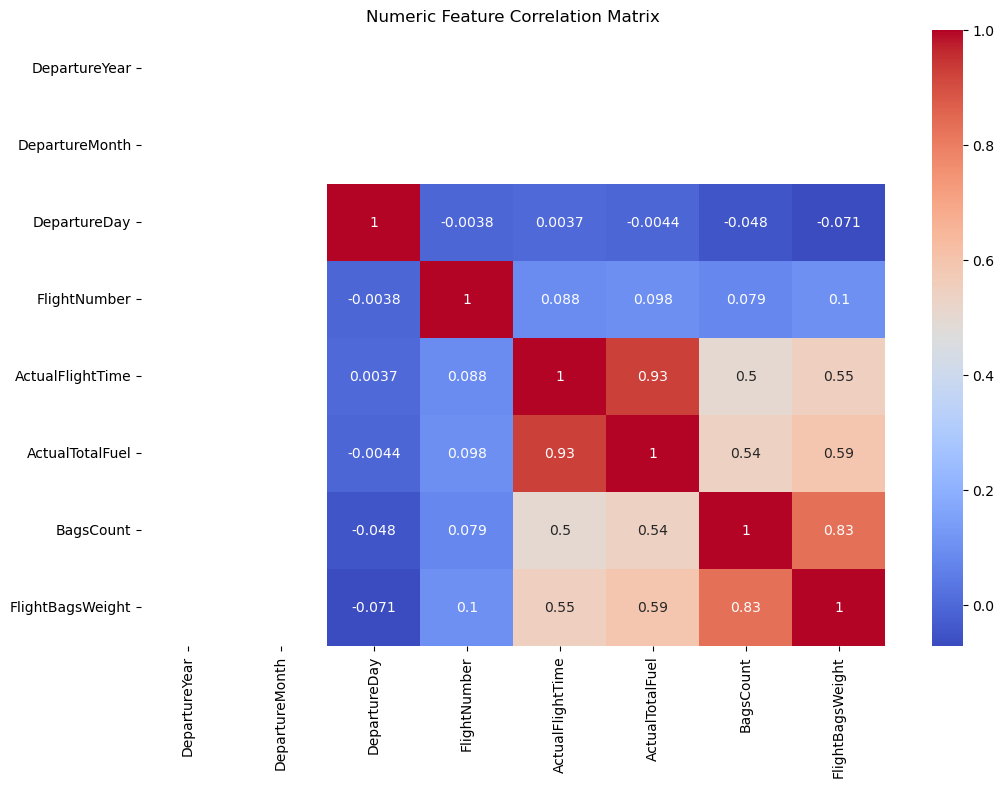

In [27]:
# we can check the correlation between the features but only for the numeric features
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation Matrix')
plt.show()

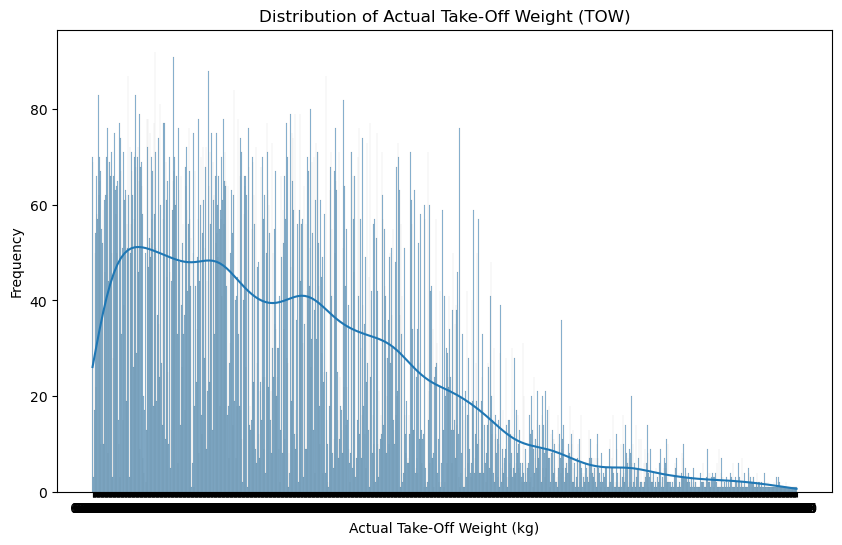

In [28]:
# distribution of the target variable 
plt.figure(figsize=(10,6))
sns.histplot(train_df['ActualTOW'], kde=True, bins=30)
plt.title('Distribution of Actual Take-Off Weight (TOW)')
plt.xlabel('Actual Take-Off Weight (kg)')
plt.ylabel('Frequency')
plt.show()

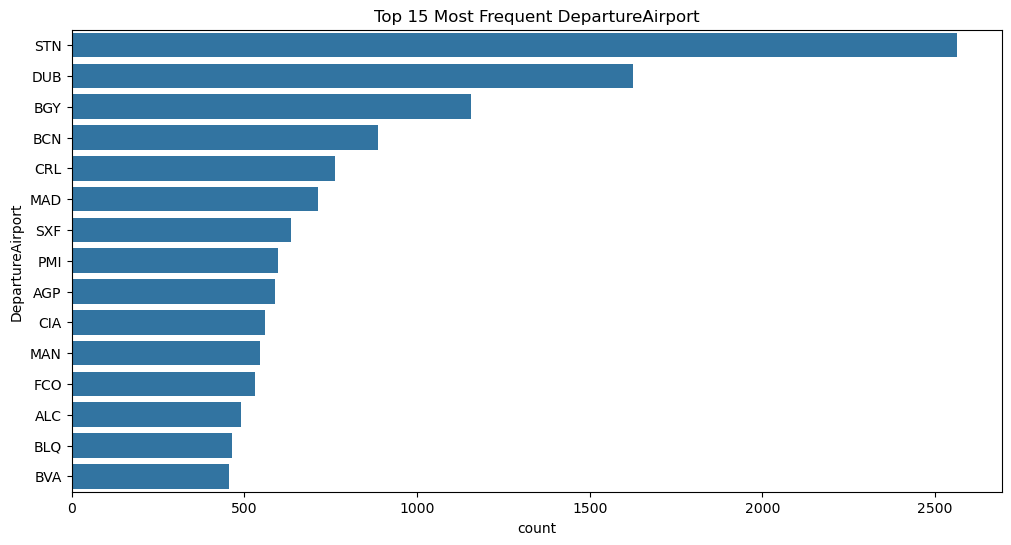

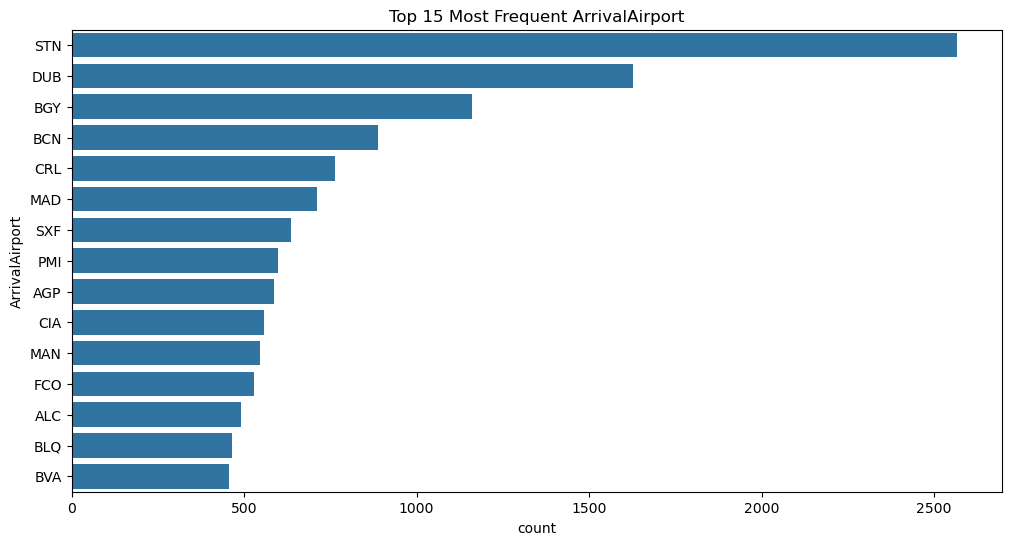

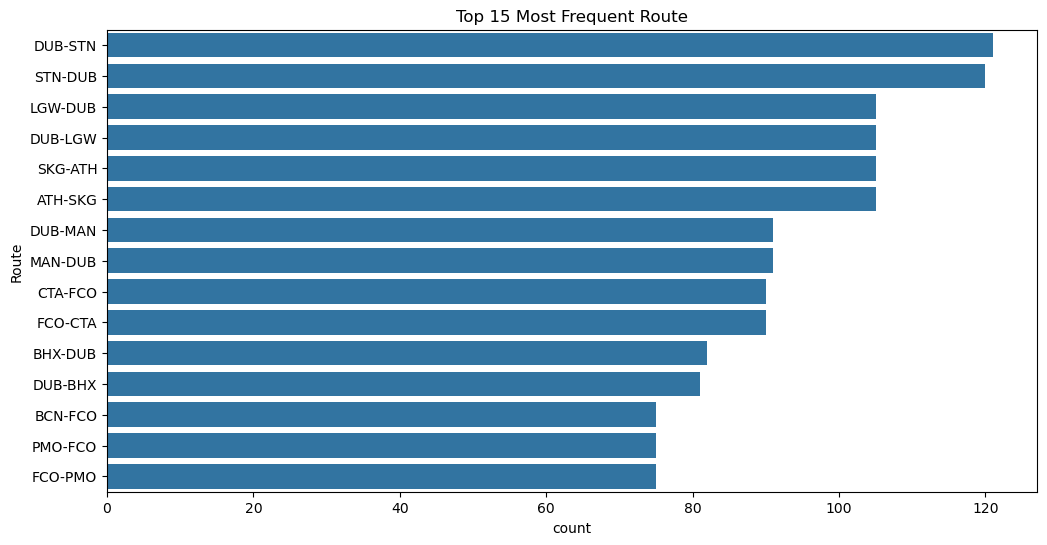

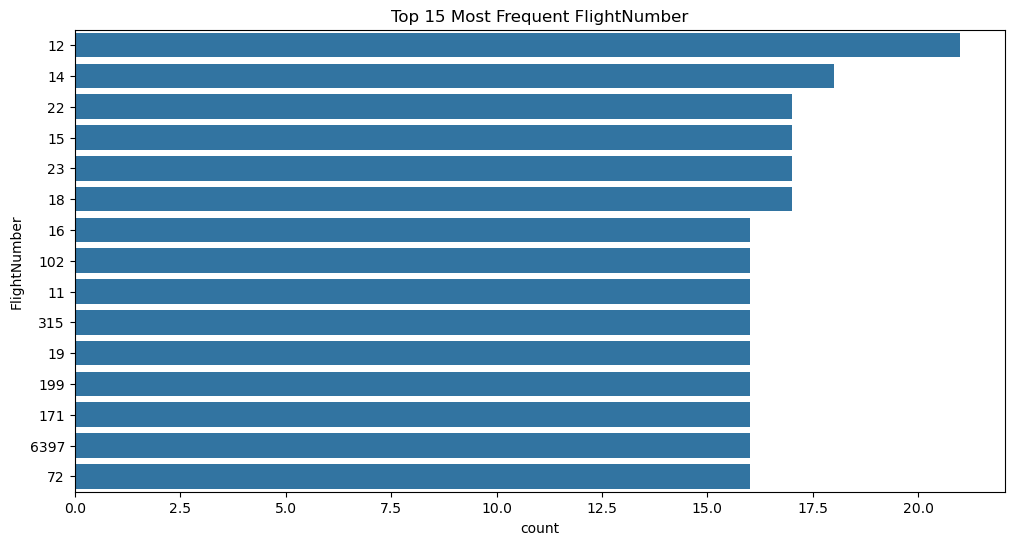

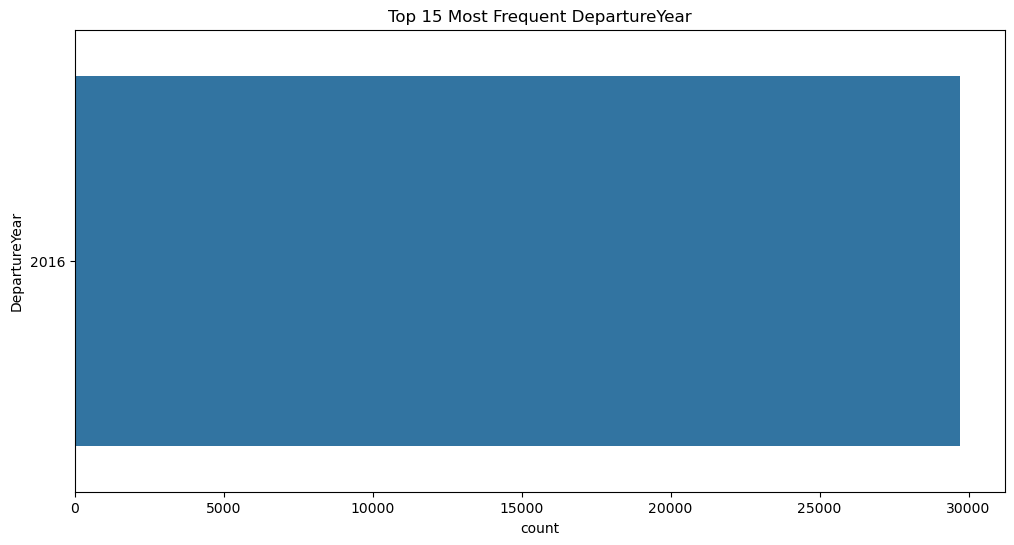

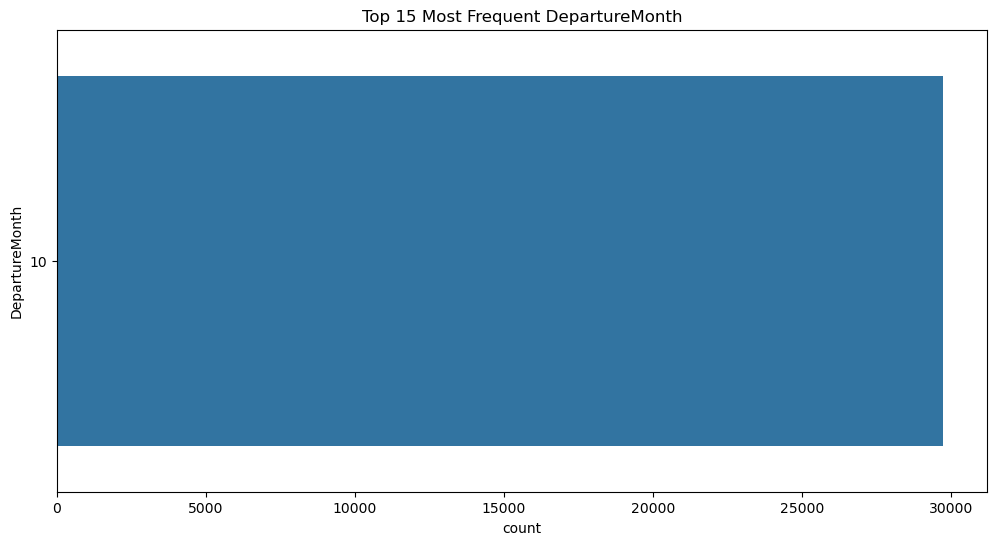

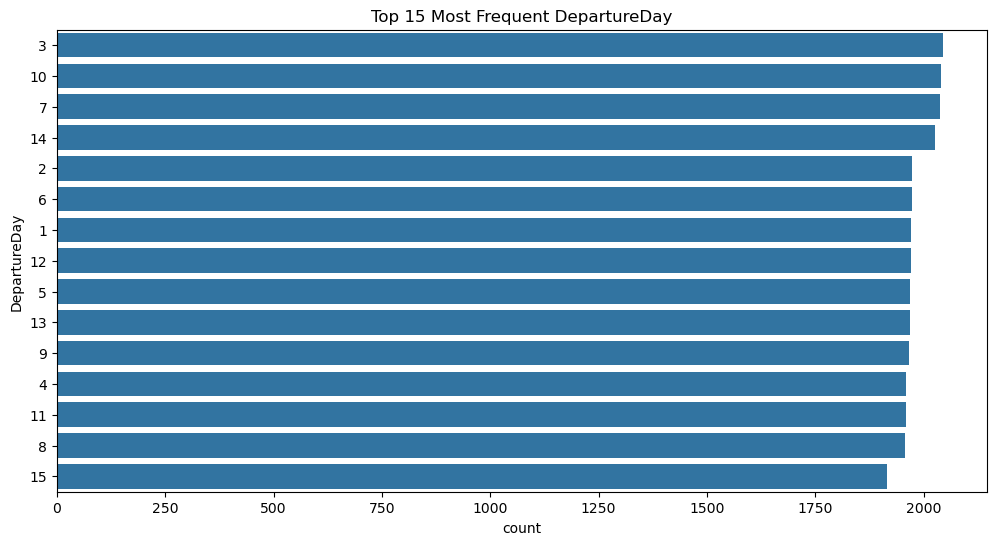

In [29]:
# we can explore the categorical features
categorical_columns = ['DepartureAirport', 'ArrivalAirport', 'Route', 'FlightNumber', 'DepartureYear', 'DepartureMonth', 'DepartureDay']
for col in categorical_columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=train_df, y=col, order=train_df[col].value_counts().index[:15])
    plt.title(f'Top 15 Most Frequent {col}')
    plt.show()

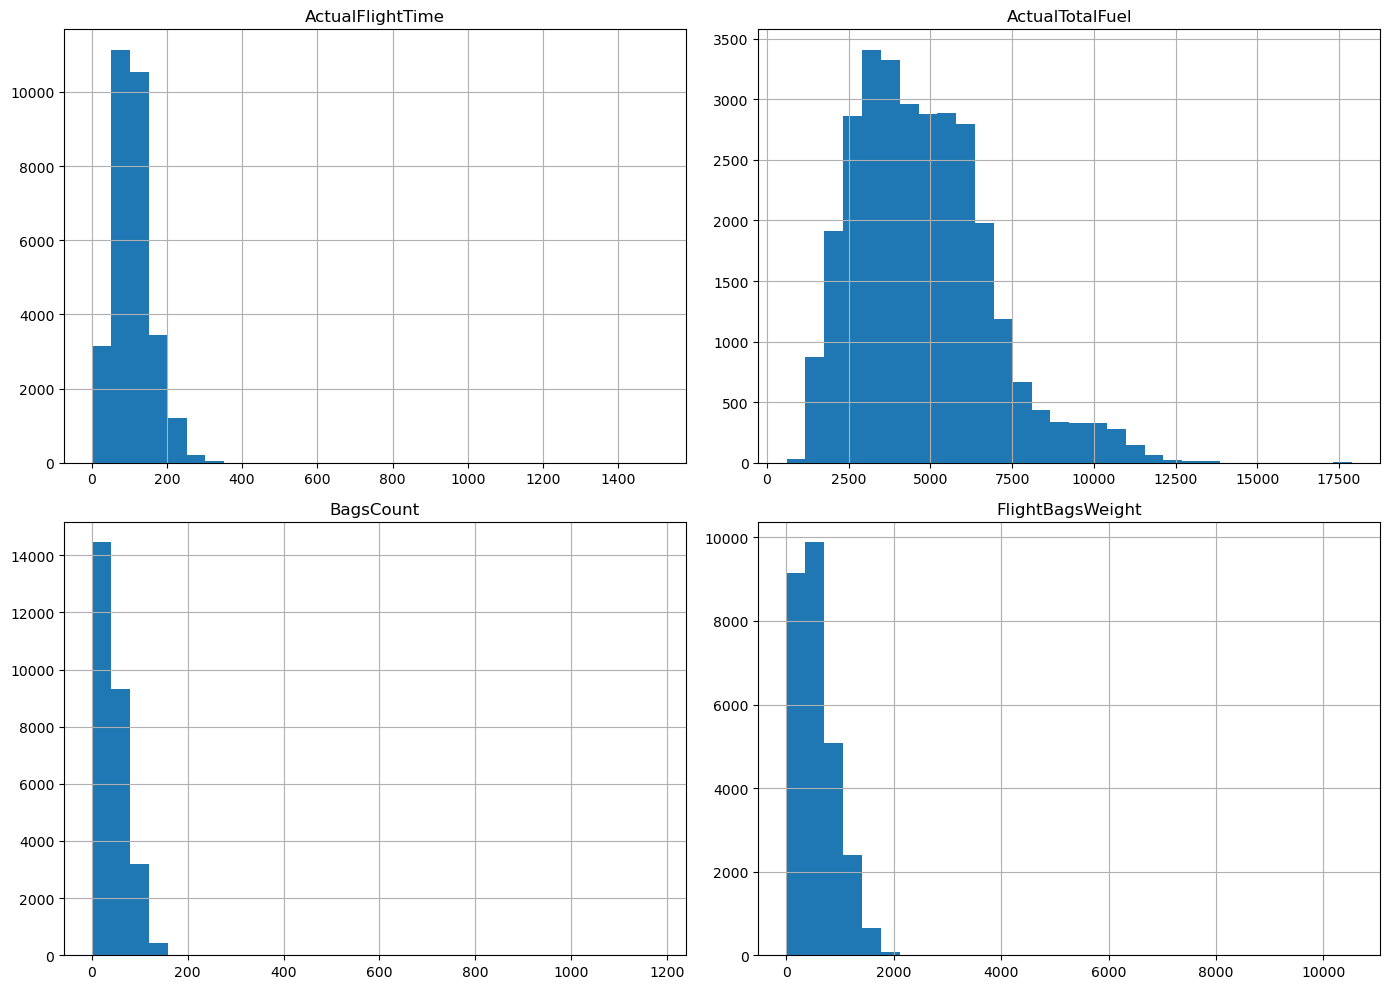

In [35]:
# and we can also check numeric feature distribution
numerical_columns = ['ActualFlightTime', 'ActualTotalFuel', 'FLownPassengers', 'BagsCount', 'FlightBagsWeight']
train_df[numerical_columns].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

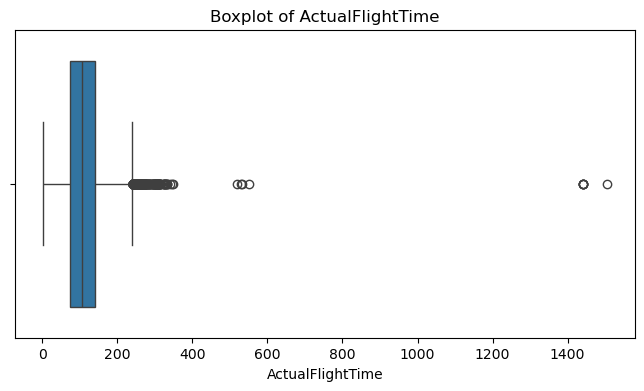

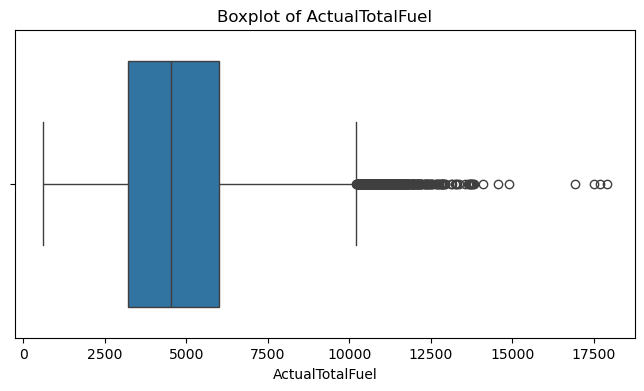

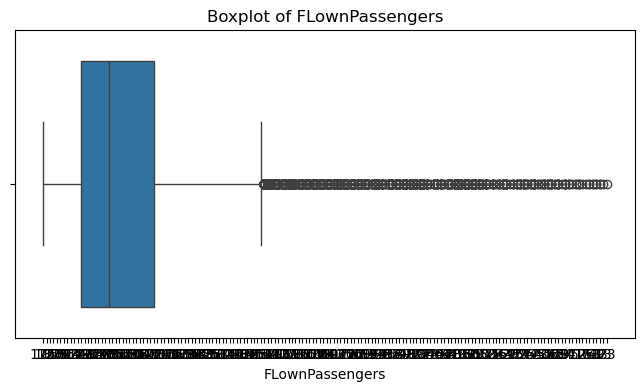

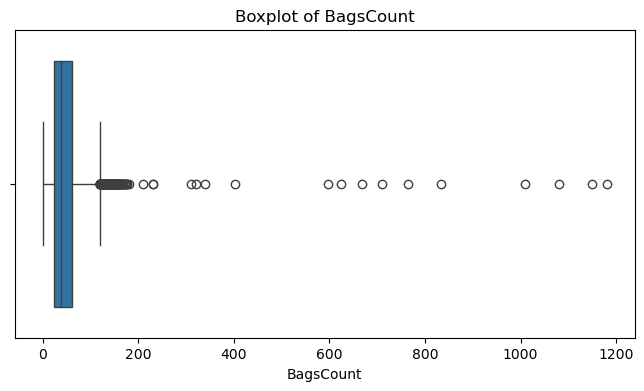

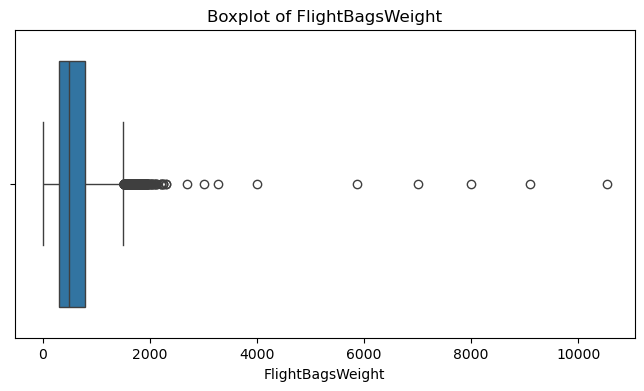

In [36]:
# we can use boxplot to see if we can catch any outliers
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

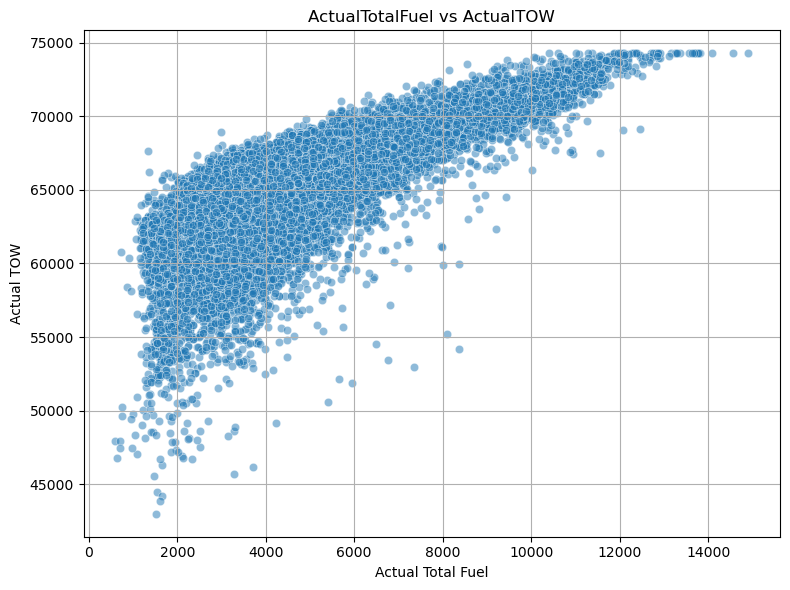

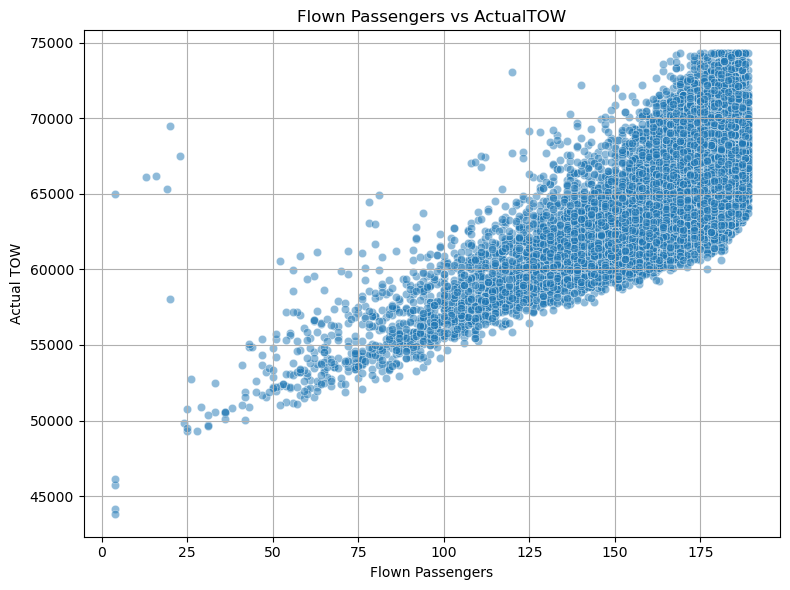

In [ ]:
# and the scatter plot to see the relationship between the features
# we can check the relationship between ActualTOW and ActualTotalFuel and FLownPassengers
# first we need to convert the columns to numeric
train_df['ActualTOW'] = pd.to_numeric(train_df['ActualTOW'], errors='coerce')
train_df['ActualTotalFuel'] = pd.to_numeric(train_df['ActualTotalFuel'], errors='coerce')
train_df['FLownPassengers'] = pd.to_numeric(train_df['FLownPassengers'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ActualTotalFuel', y='ActualTOW', data=train_df, alpha=0.5)
plt.title('ActualTotalFuel vs ActualTOW')
plt.xlabel('Actual Total Fuel')
plt.ylabel('Actual TOW')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='FLownPassengers', y='ActualTOW', data=train_df, alpha=0.5)
plt.title('Flown Passengers vs ActualTOW')
plt.xlabel('Flown Passengers')
plt.ylabel('Actual TOW')
plt.grid(True)
plt.tight_layout()
plt.show()
